In [65]:
import networkx as nx
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
import igraph as ig
from collections import Counter

In [66]:
def gnp_random_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erd?s-Rényi 
    graph, but enforcing that the resulting graph is conneted
    """
    edges = itertools.combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in itertools.groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G

In [67]:
n=200
p= 0.025
print(p)
G = gnp_random_graph(n, p)

0.025


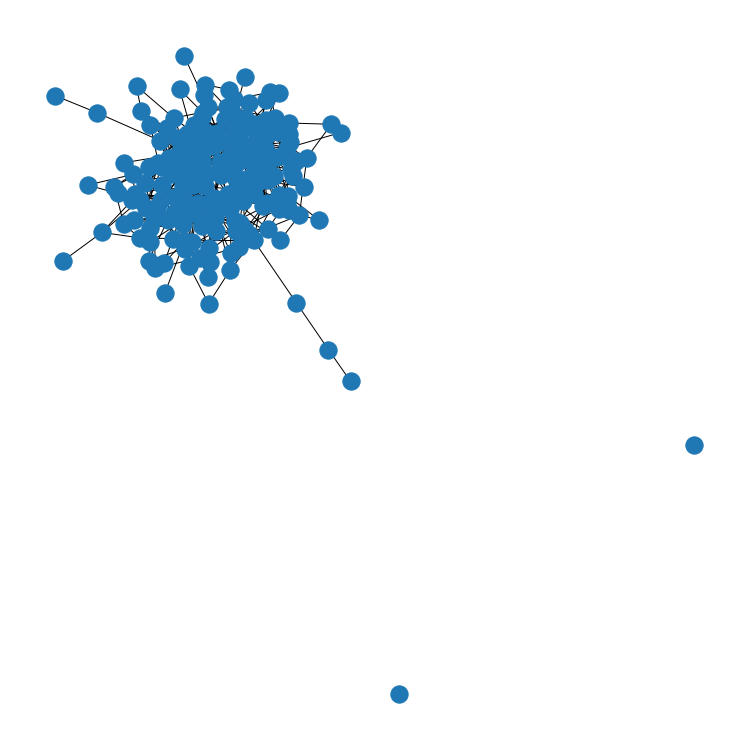

In [68]:
plt.figure(figsize=(10,10))
nx.draw(G)

In [69]:
Gedgelist = nx.edges(G)
Gnodelist = nx.nodes(G)
Bzero = nx.number_connected_components(G)
Gedgenum = len(Gedgelist)
Gnodenum = len(Gnodelist)
XG = Gnodenum - Gedgenum

In [70]:
def d(p,q):
    ""
    return np.sqrt(sum([p[i]-q[i]])**2 for i in range(len(p))) 

def distances(ps):
    ""
    nps = len(ps)
    return np.array([[d(ps[i],ps[j]) for j in range(nps)]for i in range(nps)])

def is_simplex(g, vs):
    ""
    for i in vs:
        for j in vs:
            if i != j and j not in g[i]:
                return False
    return True

def simplices(g,k):
    ""
    ss = []
    for i in g.keys():
        vvs = [j for j in g[i] if j>1]
        for subset in itertools.combinations(vvs, k):
            if is_simplex(g, subset):
                ss.append((i,) + subset)
    return ss


In [71]:
def question1func(nodes, verse):
    ""
    plt.figure(figsize=(10,10))
    n = nodes
    pxs = np.linspace(0,1, 100)
    pxs = [ round(elem, 3) for elem in pxs ]
    yxs=[]
    if verse == "Bzero":
        for i in pxs:
            G = gnp_random_graph(n, i)
            Gedgelist = nx.edges(G)
            Gnodelist = nx.nodes(G)
            Gedgenum = len(Gedgelist)
            Gnodenum = len(Gnodelist)
            Bzero = nx.number_connected_components(G)
            yxs.append(Bzero)
        
        
    elif verse == "XG":
        for i in pxs:
            G = gnp_random_graph(n, i)
            Gedgelist = nx.edges(G)
            Gnodelist = nx.nodes(G)
            Gedgenum = len(Gedgelist)
            Gnodenum = len(Gnodelist)
            XG = Gnodenum - Gedgenum
            yxs.append(XG)
        
    elif verse == "Bone":
        for i in pxs:
            G = gnp_random_graph(n, i)
            Gedgelist = nx.edges(G)
            Gnodelist = nx.nodes(G)
            Gedgenum = len(Gedgelist)
            Gnodenum = len(Gnodelist)
            Bzero = nx.number_connected_components(G)
            XG = Gnodenum - Gedgenum
            Bone = Bzero - XG
            yxs.append(Bone)
    
    elif verse == "Virus":
        for i in pxs:
            G = gnp_random_graph(n, i)
            Gedgelist = nx.edges(G)
            Gnodelist = nx.nodes(G)
            Gedgenum = len(Gedgelist)
            Gnodenum = len(Gnodelist)
            Bzero = nx.number_connected_components(G)
            XG = Gnodenum - Gedgenum
            Bone = Bzero - XG
            if Bzero != 1:
                yxs.append(0)
            elif Bzero == 1:
                yxs.append(1)
            for i in yxs:
                if i == 1:
                    first = list.index(i)
                break
            
    
    return plt.plot(pxs,yxs)

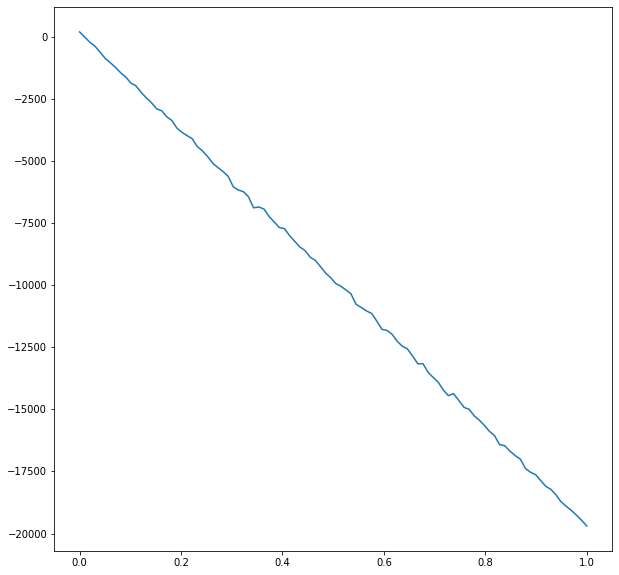

In [72]:
question1func(200, "XG")

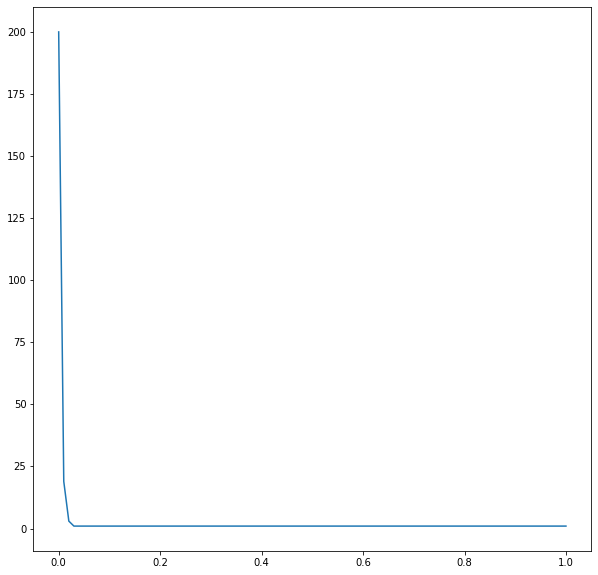

In [73]:
question1func(200, "Bzero")

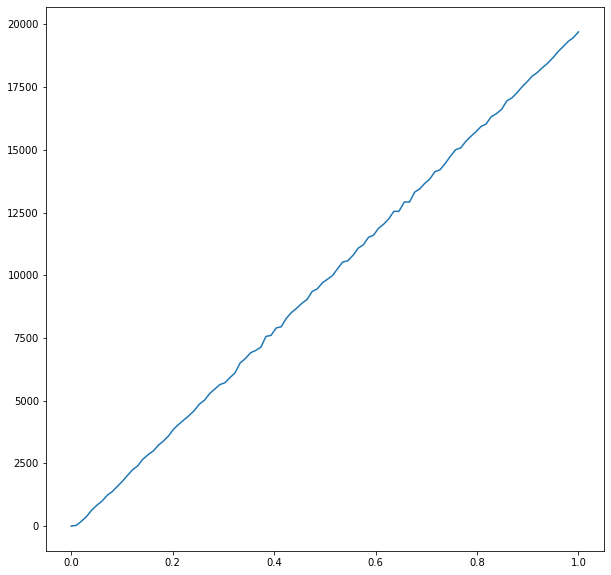

In [74]:
question1func(200, "Bone")

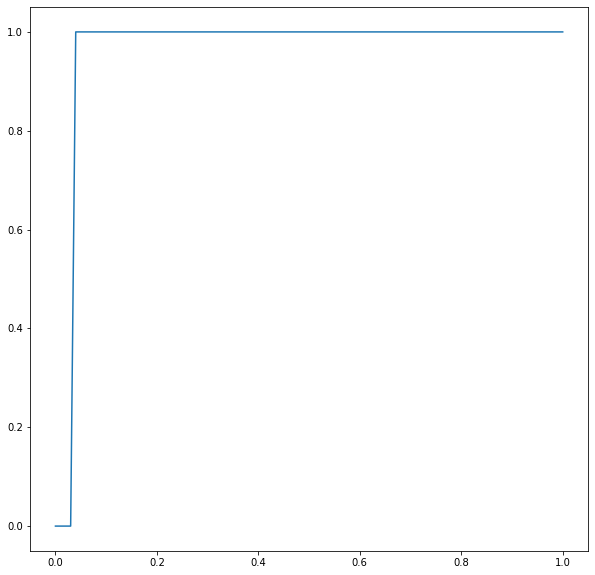

In [75]:
question1func(200, "Virus")

In [76]:
def whenfullinfected(nodes, number, start, stop, gaps):
    list = []
    n = nodes
    pxs = np.linspace(start,stop,gaps)
    pxs = [ round(elem, 3) for elem in pxs ]
    yxs=[]
    for j in range(number):
        for a in pxs:
            G = gnp_random_graph(n, a)
            Gedgelist = nx.edges(G)
            Gnodelist = nx.nodes(G)
            Gedgenum = len(Gedgelist)
            Gnodenum = len(Gnodelist)
            Bzero = nx.number_connected_components(G)
            XG = Gnodenum - Gedgenum
            Bone = Bzero - XG
            if Bzero == 1: 
                yxs.append(1)
                list.append(a)
                break
    return list

In [77]:
def calcer(nodes, number, start, stop, gaps):
    list = whenfullinfected(nodes, number, start, stop, gaps)
    fullcount = Counter(list)
    return fullcount

In [80]:
#calcer(200, 500, 0, 0.1, 25)

In [81]:
def firstonlycalcer(nodes, number, start, stop, gaps):
    list = whenfullinfected(nodes, number, start, stop, gaps)
    fullcount = Counter(list)
    #print(fullcount)
    return min(fullcount.keys())

In [82]:
#firstonlycalcer(200,100,0,0.1,25)

In [83]:
def nchangecalcer(nstart,nstop,nstep,number, start, stop, gaps):
    n = np.linspace(nstart,nstop, nstep, dtype=int)
    when = {}
    fullyat = []
    h = -1
    for i in n:
        z = firstonlycalcer(int(i), number,start, stop, gaps)
        fullyat.append(z)
    for a in n:
        h += 1
        when[a] = fullyat[h]
            
    keys = when.keys()
    values = when.values()
    return when

In [84]:
#nchangecalcer(1,500,50,50,0,0.5,100)

In [85]:
def finalq1check(nstart,nstop,nstep,number, start, stop, gaps):
    ""
    a = nchangecalcer(nstart,nstop,nstep,number, start, stop, gaps)
    b = nchangecalcer(nstart,nstop,nstep,number, start, stop, gaps)
    c = nchangecalcer(nstart,nstop,nstep,number, start, stop, gaps)

    sums= Counter()
    counters = Counter()
    for itemset in [a,b,c]:
        sums.update(itemset)
        counters.update(itemset.keys())
    
    ret = {x: float(sums[x])/counters[x] for x in sums.keys()}
    keys = ret.keys()
    values = ret.values()
    plt.plot(keys,values)

In [86]:
#finalq1check(1,500,50,100,0,0.5,100)

### Question 2 Starts HERE ###

In [87]:
points_ex = [(i,i,i,i) for i in range(101)]
points_ex.pop(0)
print(points_ex)

[(1, 1, 1, 1), (2, 2, 2, 2), (3, 3, 3, 3), (4, 4, 4, 4), (5, 5, 5, 5), (6, 6, 6, 6), (7, 7, 7, 7), (8, 8, 8, 8), (9, 9, 9, 9), (10, 10, 10, 10), (11, 11, 11, 11), (12, 12, 12, 12), (13, 13, 13, 13), (14, 14, 14, 14), (15, 15, 15, 15), (16, 16, 16, 16), (17, 17, 17, 17), (18, 18, 18, 18), (19, 19, 19, 19), (20, 20, 20, 20), (21, 21, 21, 21), (22, 22, 22, 22), (23, 23, 23, 23), (24, 24, 24, 24), (25, 25, 25, 25), (26, 26, 26, 26), (27, 27, 27, 27), (28, 28, 28, 28), (29, 29, 29, 29), (30, 30, 30, 30), (31, 31, 31, 31), (32, 32, 32, 32), (33, 33, 33, 33), (34, 34, 34, 34), (35, 35, 35, 35), (36, 36, 36, 36), (37, 37, 37, 37), (38, 38, 38, 38), (39, 39, 39, 39), (40, 40, 40, 40), (41, 41, 41, 41), (42, 42, 42, 42), (43, 43, 43, 43), (44, 44, 44, 44), (45, 45, 45, 45), (46, 46, 46, 46), (47, 47, 47, 47), (48, 48, 48, 48), (49, 49, 49, 49), (50, 50, 50, 50), (51, 51, 51, 51), (52, 52, 52, 52), (53, 53, 53, 53), (54, 54, 54, 54), (55, 55, 55, 55), (56, 56, 56, 56), (57, 57, 57, 57), (58, 58, 

In [125]:
def d(p,q):
    ""
    return np.sqrt((p[0]-q[0])**2+(p[1]-q[1])**2+(p[2]-q[2])**2+(p[3]-q[3])**2)

In [127]:
d((2,1,1,2),(1,1,1,1))

1.4142135623730951

In [146]:
def distancer(ps):
    ""
    nps = len(ps)
    return np.array([[d(ps[i],ps[j]) for j in range(nps)] for i in range(nps)])

In [147]:
dists = distancer(points_ex)

In [148]:
dists

array([[  0.,   2.,   4., ..., 194., 196., 198.],
       [  2.,   0.,   2., ..., 192., 194., 196.],
       [  4.,   2.,   0., ..., 190., 192., 194.],
       ...,
       [194., 192., 190., ...,   0.,   2.,   4.],
       [196., 194., 192., ...,   2.,   0.,   2.],
       [198., 196., 194., ...,   4.,   2.,   0.]])

In [154]:
def grapher(distances, eps):
    ""
    graph = {}
    nverts = np.shape(distances)[0]
    for i in range(nverts):
        graph[i] = []
        for j in range(nverts):
            if distances[i,j] <= eps and i != j:
                graph[i].append(j)
    return graph

In [153]:
def is_simplex(g, vs):
    ""
    for i in vs

{0: [1], 1: [0, 2], 2: [1, 3], 3: [2, 4], 4: [3, 5], 5: [4, 6], 6: [5, 7], 7: [6, 8], 8: [7, 9], 9: [8, 10], 10: [9, 11], 11: [10, 12], 12: [11, 13], 13: [12, 14], 14: [13, 15], 15: [14, 16], 16: [15, 17], 17: [16, 18], 18: [17, 19], 19: [18, 20], 20: [19, 21], 21: [20, 22], 22: [21, 23], 23: [22, 24], 24: [23, 25], 25: [24, 26], 26: [25, 27], 27: [26, 28], 28: [27, 29], 29: [28, 30], 30: [29, 31], 31: [30, 32], 32: [31, 33], 33: [32, 34], 34: [33, 35], 35: [34, 36], 36: [35, 37], 37: [36, 38], 38: [37, 39], 39: [38, 40], 40: [39, 41], 41: [40, 42], 42: [41, 43], 43: [42, 44], 44: [43, 45], 45: [44, 46], 46: [45, 47], 47: [46, 48], 48: [47, 49], 49: [48, 50], 50: [49, 51], 51: [50, 52], 52: [51, 53], 53: [52, 54], 54: [53, 55], 55: [54, 56], 56: [55, 57], 57: [56, 58], 58: [57, 59], 59: [58, 60], 60: [59, 61], 61: [60, 62], 62: [61, 63], 63: [62, 64], 64: [63, 65], 65: [64, 66], 66: [65, 67], 67: [66, 68], 68: [67, 69], 69: [68, 70], 70: [69, 71], 71: [70, 72], 72: [71, 73], 73: [72, 7